In [76]:
import pandas as pd

In [77]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

In [78]:
len(train), len(test)

(1200000, 800000)

In [79]:
df = pd.concat([train, test], axis=0)

In [80]:
del df['id']

In [81]:
# annual income & premium amount has a long tail -> log transformer
from sklearn.preprocessing import FunctionTransformer
import numpy as np

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
df['Annual Income'] = log_transformer.fit_transform(df[['Annual Income']])
df['Premium Amount'] = log_transformer.fit_transform(df[['Premium Amount']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_function_transformer.py:202: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_function_transformer.py:202: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


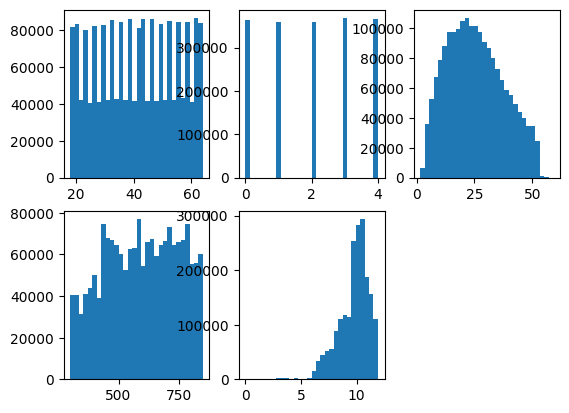

In [82]:
import matplotlib.pyplot as plt

plt.subplot(2, 3, 1)
plt.hist(df['Age'], bins=30, label="Age")

plt.subplot(2, 3, 2)
plt.hist(df['Number of Dependents'], bins=30, label="Number of Dependents")

plt.subplot(2, 3, 3)
plt.hist(df['Health Score'], bins=30, label="Health Score")

plt.subplot(2, 3, 4)
plt.hist(df['Credit Score'], bins=30, label="Credit Score")

plt.subplot(2, 3, 5)
plt.hist(df['Annual Income'], bins=30, label="Annual Income")


plt.show()

In [83]:
# Vehicle Age null -> median
df['Vehicle Age'] = df['Vehicle Age'].fillna(df['Vehicle Age'].median())

In [84]:
# Insurance Duration null -> Mode
df['Insurance Duration'] = df['Insurance Duration'].fillna(df['Insurance Duration'].mode()[0])

In [85]:
# Age, Number of Dependents null -> Uniform Distribution
for col in ['Age', 'Number of Dependents']:
    df[col] = df[col].fillna(np.random.randint(df['Age'].min(), df['Age'].max()))

In [86]:
# Annual Income, Number of Dependents, Health Score, Credit Score null -> Normal Distribution
for col in ['Annual Income', 'Health Score', 'Credit Score']:
    df[col] = df[col].fillna(np.random.normal(df[col].mean(), df[col].std()))

In [87]:
# Marital Status, Occupation, Customer Feedback null -> Pick one randomly
import random

for col in ['Marital Status', 'Occupation', 'Customer Feedback']:
    df[col].fillna(random.choice(df[col].dropna().tolist()), inplace=True)

<ipython-input-87-4827dab2f5a8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(random.choice(df[col].dropna().tolist()), inplace=True)


In [88]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   2000000 non-null  float64
 1   Gender                2000000 non-null  object 
 2   Annual Income         2000000 non-null  float64
 3   Marital Status        2000000 non-null  object 
 4   Number of Dependents  2000000 non-null  float64
 5   Education Level       2000000 non-null  object 
 6   Occupation            2000000 non-null  object 
 7   Health Score          2000000 non-null  float64
 8   Location              2000000 non-null  object 
 9   Policy Type           2000000 non-null  object 
 10  Previous Claims       1393169 non-null  float64
 11  Vehicle Age           2000000 non-null  float64
 12  Credit Score          2000000 non-null  float64
 13  Insurance Duration    2000000 non-null  float64
 14  Policy Start Date     2000000 non-null  

In [100]:
df1 = df.copy()

In [101]:
# invert 'Policy Start Date' to 'Policy Start Year'
df1['Policy Start Date'] = pd.to_datetime(df1['Policy Start Date'])

In [102]:
df1['Policy Start Date'].value_counts()

,count
Policy Start Date,
2022-08-30 15:21:39.134960,232
2020-02-08 15:21:39.134960,218
2022-02-02 15:21:39.134960,211
2023-08-13 15:21:39.155231,200
2023-11-02 15:21:39.134960,197
...,...
2022-01-06 15:21:39.123645,1
2020-11-28 15:21:39.169102,1
2021-03-14 15:21:39.243823,1


In [103]:
df1['Policy Start Year'] = pd.DatetimeIndex(df1['Policy Start Date']).year

In [104]:
df1['Policy Start Year'].value_counts()

,count
Policy Start Year,
2022,409127
2021,408649
2020,402870
2023,398493
2024,240087
2019,140774


In [105]:
df1['Policy Start Year'].astype('object')

,Policy Start Year
0,2023
1,2023
2,2023
3,2024
4,2021
...,...
799995,2021
799996,2023
799997,2019
799998,2022


In [106]:
df['Policy Start Year'] = df1['Policy Start Year'].astype('object')

In [107]:
del df['Policy Start Date']

In [108]:
df.insert(14, 'Policy Start Year', df.pop('Policy Start Year'))

In [110]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   2000000 non-null  float64
 1   Gender                2000000 non-null  object 
 2   Annual Income         2000000 non-null  float64
 3   Marital Status        2000000 non-null  object 
 4   Number of Dependents  2000000 non-null  float64
 5   Education Level       2000000 non-null  object 
 6   Occupation            2000000 non-null  object 
 7   Health Score          2000000 non-null  float64
 8   Location              2000000 non-null  object 
 9   Policy Type           2000000 non-null  object 
 10  Previous Claims       1393169 non-null  float64
 11  Vehicle Age           2000000 non-null  float64
 12  Credit Score          2000000 non-null  float64
 13  Insurance Duration    2000000 non-null  float64
 14  Policy Start Year     2000000 non-null  

In [111]:
df = pd.get_dummies(df, dtype='int')

In [112]:
# make a regression model to predict previous claims
df_previous_claims = df[df['Previous Claims'].notna()]
df_no_previous_claims = df[df['Previous Claims'].isna()]

In [ ]:
# del Premiun Amount
del df_previous_claims['Premium Amount']
del df_no_previous_claims['Premium Amount']

In [116]:
%pip install catboost

In [117]:
# train_test split
from sklearn.model_selection import train_test_split
train_set, test_set_from_train = train_test_split(df_previous_claims, test_size=0.2, random_state=42)

# split target and features
X_train = df_previous_claims.drop('Previous Claims', axis=1)
y_train = df_previous_claims['Previous Claims'].copy()

# build model
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from catboost import CatBoostRegressor as Catboost

voting_reg = VotingRegressor(
    estimators=[
        ('lin_reg', LinearRegression()),
        ('xgboost', xgb.XGBRegressor(max_depth=6, n_estimators=40, random_state=42)),
        ('catboost',Catboost(iterations=10, depth=8, learning_rate=1, random_state=42)),
    ]
)
voting_reg.fit(X_train, y_train)

# score
from sklearn.metrics import root_mean_squared_error
y_pred = voting_reg.predict(X_train)
rmsle = root_mean_squared_error(y_train, y_pred)
rmsle

0:	learn: 0.9651898	total: 589ms	remaining: 5.3s
1:	learn: 0.9645135	total: 981ms	remaining: 3.92s
2:	learn: 0.9643252	total: 1.23s	remaining: 2.88s
3:	learn: 0.9634095	total: 1.48s	remaining: 2.21s
4:	learn: 0.9629961	total: 1.73s	remaining: 1.73s
5:	learn: 0.9628790	total: 1.98s	remaining: 1.32s
6:	learn: 0.9627459	total: 2.26s	remaining: 970ms
7:	learn: 0.9626407	total: 2.5s	remaining: 625ms
8:	learn: 0.9625648	total: 2.75s	remaining: 306ms
9:	learn: 0.9624260	total: 3s	remaining: 0us


0.9633465637652482

In [118]:
X_test = test_set_from_train.drop('Previous Claims', axis=1)
y_test = test_set_from_train['Previous Claims'].copy()

In [119]:
y_pred = voting_reg.predict(X_test)
rmsle = root_mean_squared_error(y_test, y_pred)
rmsle

0.9614499240421244

In [121]:
test_set = df_no_previous_claims.copy()
del test_set['Previous Claims']
y_pred = voting_reg.predict(test_set)

In [122]:
len(y_pred)

606831

In [123]:
# fill nan of df['Previous Claims'] with y_pred
df.loc[df['Previous Claims'].isna(), 'Previous Claims'] = y_pred

In [124]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 799999
Data columns (total 45 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Age                          2000000 non-null  float64
 1   Annual Income                2000000 non-null  float64
 2   Number of Dependents         2000000 non-null  float64
 3   Health Score                 2000000 non-null  float64
 4   Previous Claims              2000000 non-null  float64
 5   Vehicle Age                  2000000 non-null  float64
 6   Credit Score                 2000000 non-null  float64
 7   Insurance Duration           2000000 non-null  float64
 8   Premium Amount               1200000 non-null  float64
 9   Gender_Female                2000000 non-null  int64  
 10  Gender_Male                  2000000 non-null  int64  
 11  Marital Status_Divorced      2000000 non-null  int64  
 12  Marital Status_Married       2000000 non-null  i

In [126]:
train = df.iloc[:len(train)]
test = df.iloc[len(train):]

In [127]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 0 to 1199999
Data columns (total 45 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Age                          1200000 non-null  float64
 1   Annual Income                1200000 non-null  float64
 2   Number of Dependents         1200000 non-null  float64
 3   Health Score                 1200000 non-null  float64
 4   Previous Claims              1200000 non-null  float64
 5   Vehicle Age                  1200000 non-null  float64
 6   Credit Score                 1200000 non-null  float64
 7   Insurance Duration           1200000 non-null  float64
 8   Premium Amount               1200000 non-null  float64
 9   Gender_Female                1200000 non-null  int64  
 10  Gender_Male                  1200000 non-null  int64  
 11  Marital Status_Divorced      1200000 non-null  int64  
 12  Marital Status_Married       1200000 non-null  

In [128]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800000 entries, 0 to 799999
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Age                          800000 non-null  float64
 1   Annual Income                800000 non-null  float64
 2   Number of Dependents         800000 non-null  float64
 3   Health Score                 800000 non-null  float64
 4   Previous Claims              800000 non-null  float64
 5   Vehicle Age                  800000 non-null  float64
 6   Credit Score                 800000 non-null  float64
 7   Insurance Duration           800000 non-null  float64
 8   Premium Amount               0 non-null       float64
 9   Gender_Female                800000 non-null  int64  
 10  Gender_Male                  800000 non-null  int64  
 11  Marital Status_Divorced      800000 non-null  int64  
 12  Marital Status_Married       800000 non-null  int64  
 13  Mari

In [129]:
train.to_csv('03_train.csv', index=False)
test.to_csv('03_test.csv', index=False)